### Convering DeepFashion2 to out format

In [83]:

import numpy as np
import cv2
import json




In [43]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import os
from PIL import Image
import numpy as np

In [36]:
class DeepFashionDataset(Dataset):
    def __init__(self, split, photo_transform=None, cloth_transform=None):
        self.path = f'../datasets/DeepFashion/{split}'
        
        self.photo_transform = photo_transform
        self.cloth_transform = cloth_transform
        
        self.objects = [x[:6] for x in os.listdir(f'{self.path}/centred_clothes')]

    def __len__(self):
        return len(self.objects)

    def __getitem__(self, idx):
        assert isinstance(idx, int)

        person_image = Image.open(f'{self.path}/image/{self.objects[idx]}.jpg')
        if self.photo_transform:
            person_image = self.photo_transform(person_image)
            
        mask = np.load(f'{self.path}/segmentation_masks/{self.objects[idx]}_mask.npy')
        
        centred_cloth = Image.fromarray(np.load(f'{self.path}/centred_clothes/{self.objects[idx]}_cc.npy'))
        if self.cloth_transform:
            centred_cloth = self.cloth_transform(centred_cloth)

        return person_image, mask, centred_cloth

In [37]:
ls '../datasets/DeepFashion/validation'

annos/  centred_clothes/  image/  segmentation_masks/


In [127]:
dataset = DeepFashionDataset('validation')

In [128]:
len(dataset)

9344

In [168]:
img, mask, cc = dataset[858]

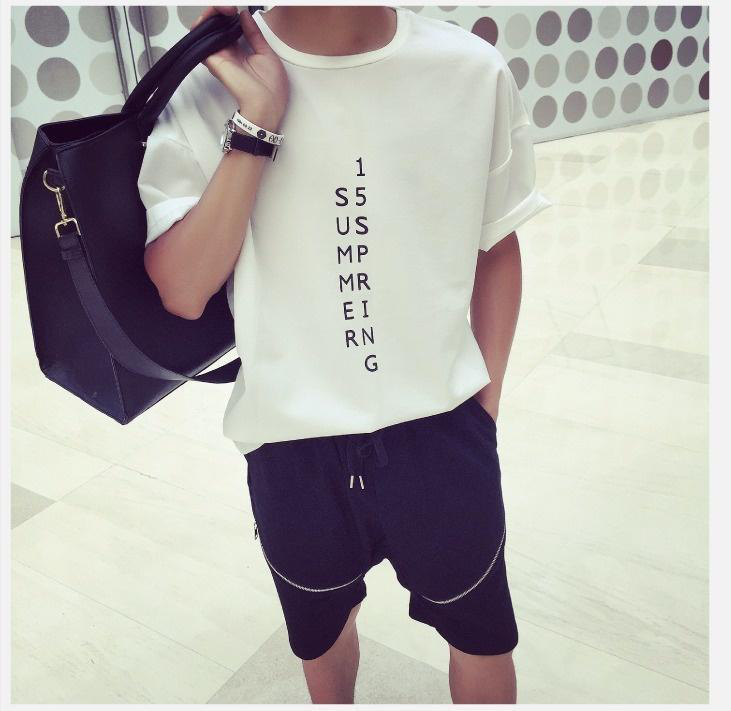

In [169]:
img

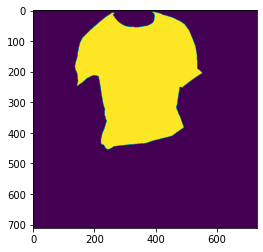

In [170]:
plt.imshow(mask.astype(np.float));

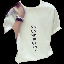

In [171]:
cc

In [113]:
idx = '000200'

annot = json.load(open(f'../datasets/DeepFashion/validation/annos/{idx}.json'))
img = Image.open(f'../datasets/DeepFashion/validation/image/{idx}.jpg')

In [116]:
annot['item1']

{'segmentation': [[139.82387475538152,
   161.86049762370683,
   138.7756521739129,
   187.99391304347895,
   128.53565217391295,
   195.03391304347892,
   116.37565217391301,
   196.95391304347893,
   115.33407883701402,
   204.2074363992173,
   122.98714006150385,
   217.47274252166636,
   135.2320380206876,
   230.73804864411542,
   148.49734414313667,
   247.06457925636042,
   162.27285434721838,
   265.43192619513604,
   179.6197931227287,
   296.04417109309543,
   192.3748951635451,
   312.8809057869731,
   192.88509924517774,
   322.06457925636084,
   193.39530332681042,
   329.7176404808507,
   203.08918087783087,
   350.125803746157,
   211.76265026558605,
   369.0033547665653,
   227.7921442549622,
   408.1947162426612,
   220.13908303047236,
   365.33757338551806,
   214.52683813251315,
   344.41920603857915,
   212.48602180598252,
   332.1743080793954,
   208.40438915292128,
   317.888593793681,
   206.8737769080233,
   302.07226726306874,
   206.8737769080233,
   288.80696

In [118]:
def get_mask_from_polygon(polygons, img_path):
    mask = np.zeros(np.array(Image.open(img_path)).shape[:-1], dtype=np.uint8)
    for poly in polygons:
        pts = np.array([[poly[2 * i], poly[2 * i + 1]] 
                        for i in range(len(poly) // 2)], dtype=np.int32).reshape(-1, 2)
        cv2.fillPoly(mask, [pts], 1)
    return mask.astype(bool)

In [120]:
mask = get_mask_from_polygon(annot['item1']['segmentation'], f'../datasets/DeepFashion/validation/image/{idx}.jpg' )

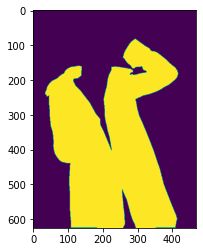

In [121]:
plt.imshow(mask.astype(np.float))

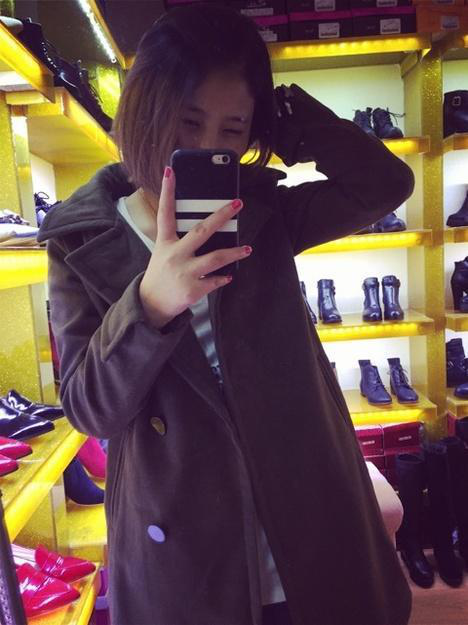

In [117]:
img

In [124]:
ls

Untitled.ipynb  convert_deep_fashion.py


In [126]:
!python3 convert_deep_fashion.py validation

100%|█████████████████████████████████████| 32153/32153 [07:52<00:00, 68.03it/s]
